<a href="https://colab.research.google.com/github/udithait/tenserFlow-demo/blob/master/basic_tf_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

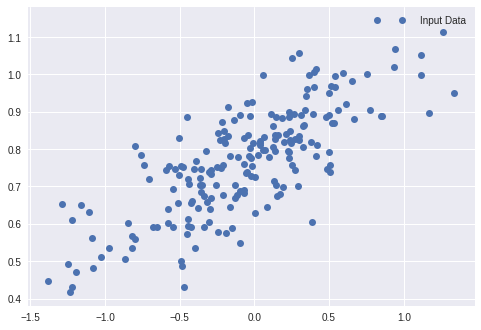

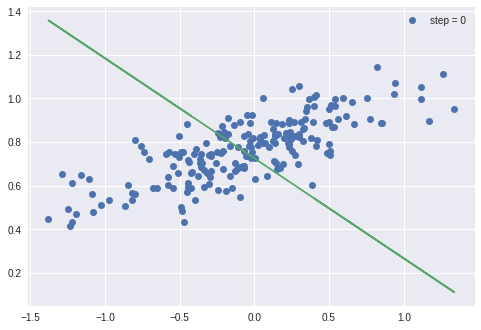

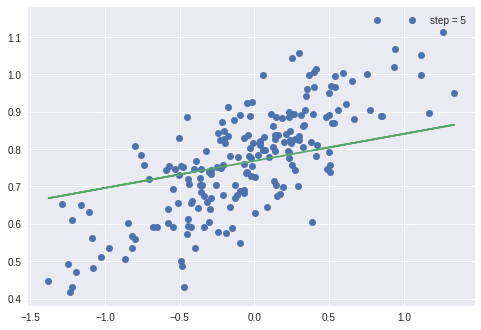

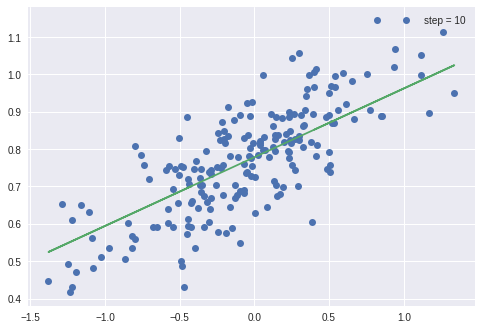

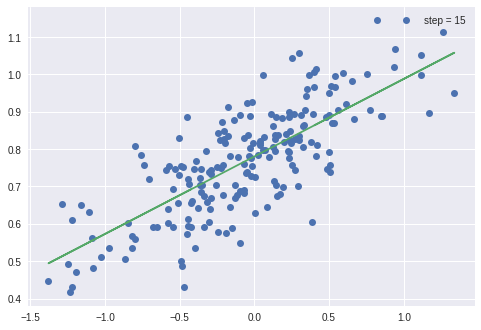

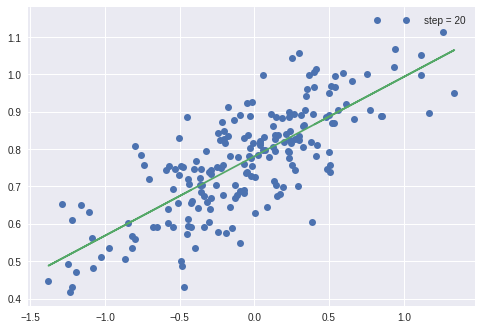

In [6]:
import numpy as np

number_of_points = 200
x_point = []
y_point = []
a = 0.22
b = 0.78
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = a*x + b +np.random.normal(0.0,0.1)
    x_point.append([x])
    y_point.append([y])


import matplotlib.pyplot as plt

plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend()
plt.show()

import tensorflow as tf


A = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = A * x_point + B

cost_function = tf.reduce_mean(tf.square(y - y_point))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(cost_function)

model = tf.initialize_all_variables()

with tf.Session() as session:
        session.run(model)
        for step in range(0,21):
                session.run(train)
                if (step % 5) == 0:
                        plt.plot(x_point, y_point,
                                 'o',label='step = {}'.format(step))
                        plt.plot(x_point,
                                 session.run(A) * x_point + session.run(B))
                        plt.legend()
                        plt.show()
